# Régression linéaire avec statsmodels et sickit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On importe les objets des bibliothèques nécessaires

In [6]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

On importe les données

In [7]:
frame_pub=pd.read_csv("Advertising.csv",index_col=0)

In [8]:
frame_pub.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


On construit le modèle

In [9]:
#avec statsmodels
modele_ols=ols("Sales~TV+Radio+Newspaper", data=frame_pub).fit()

In [10]:
modele_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 27 Apr 2017   Prob (F-statistic):           1.58e-96
Time:                        14:49:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#on prédit à partir du modèle
modele_ols.predict(pd.DataFrame({frame_pub.columns[0]:12,frame_pub.columns[1]:14,frame_pub.columns[2]:15}
                                ,index=[1]))

array([ 6.11192296])

In [12]:
modele_ols.predict({frame_pub.columns[0]:[12,50],frame_pub.columns[1]:[14,45]
                    ,frame_pub.columns[2]:[15,3]})

array([  6.11192296,  13.70785992])

In [13]:
#on peut utiliser un dictionnaire
{frame_pub.columns[0]:12,frame_pub.columns[1]:14,frame_pub.columns[2]:15}

{'Newspaper': 15, 'Radio': 14, 'TV': 12}

In [14]:
#modele OLS avec scikit-learn
modele_ols_skl=LinearRegression()

In [15]:
#préparer les données
x=frame_pub[frame_pub.columns[0:3]]
#autre approche
x=frame_pub.drop('Sales',axis=1)

y=frame_pub.iloc[:,-1]

In [16]:
modele_ols_skl.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
modele_ols_skl.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [18]:
#on prédit à partir du modèle
y_pred=modele_ols_skl.predict(x)

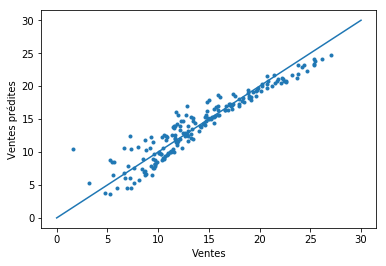

In [19]:
#on représente les résutats
plt.scatter(y,y_pred,marker=".")
plt.plot(np.linspace(0,30,10),np.linspace(0,30,10))
plt.xlabel("Ventes")
plt.ylabel("Ventes prédites")

In [20]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# découpage des données en apprentissage / test
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [22]:
modele_ols_skl2=LinearRegression()

In [23]:
modele_ols_skl2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_test_pred=modele_ols_skl2.predict(x_test)

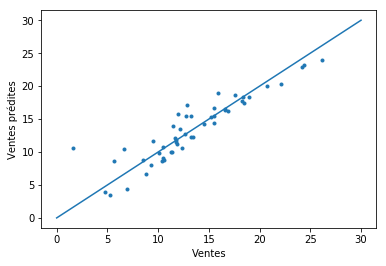

In [25]:
plt.scatter(y_test,y_test_pred,marker=".")
plt.plot(np.linspace(0,30,10),np.linspace(0,30,10))
plt.xlabel("Ventes")
plt.ylabel("Ventes prédites")

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
frame_nba=pd.read_csv("nba_2013.csv")

In [28]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [29]:
frame_nba.dropna(inplace=True)

In [30]:
frame_nba[frame_nba["player"]=="Tony Parker"]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
344,Tony Parker,PG,31,SAS,68,68,1997,456,914,0.499,...,138,155,388,36,9,151,86,1134,2013-2014,2013


In [31]:
modele_knn=KNeighborsRegressor(n_neighbors=10)

In [32]:
frame_nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [33]:
x_nba=frame_nba[['g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

In [34]:
#récupérer les var quanti
x_nba=frame_nba[[var for var in frame_nba.columns if frame_nba[var].dtypes!=object]]
x_nba=x_nba.drop("pts",axis=1)

In [35]:
y_nba=frame_nba["pts"]

In [36]:
# découpage des données en apprentissage / test
x_train, x_test,y_train,y_test=train_test_split(x_nba,y_nba,test_size=0.20)

In [37]:
modele_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [38]:
y_test_pred=modele_knn.predict(x_test)

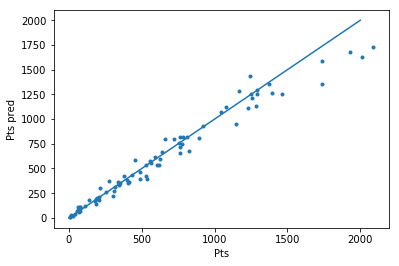

In [39]:
plt.scatter(y_test,y_test_pred,marker=".")
plt.plot(np.linspace(0,2000,10),np.linspace(0,2000,10))
plt.xlabel("Pts")
plt.ylabel("Pts pred")

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mean_squared_error(y_test,y_test_pred)

10937.356790123456

In [42]:
((y_test-y_test_pred)**2).mean()

10937.356790123455